> 따라써보는 것이 목적, 내용이 번역체임을 주의

# The seaborn.objects interface

`Seaborn.objects` 네임 스페이스는 Seaborn 플롯을 만들기위해 완전히 새로운 버전 0.12에 도입되었다. 이 인터페이스는 데이터를 변환하고 플롯하기 위한 컴포저블 클래스 모음으로 구성된 부다 일관성있고 유연한 API를 제공한다. 기존의 Seaborn 함수와 달리 새로운 인터페이스는 matplotlib로 드롭다운하지 않고 end-to-end plot지정 및 사용자 지정을 지원하는 것을 목표로 합니다. (필요한 경우 계속 사용도 가능하다.)

In [3]:
import seaborn.objects as so
import seaborn as sns

In [4]:
penguins = sns.load_dataset('penguins')

`Seaborn.objects` 네임 스페이스는 관련 클래스에 대한 액세스를 제공한다. 가장 중요한 것은 Plot이다. plot 객체를 인스턴스화하고 해당 메서드를 호출하여 플롯을 지정한다. 간단한 예제를 살펴보겠다.

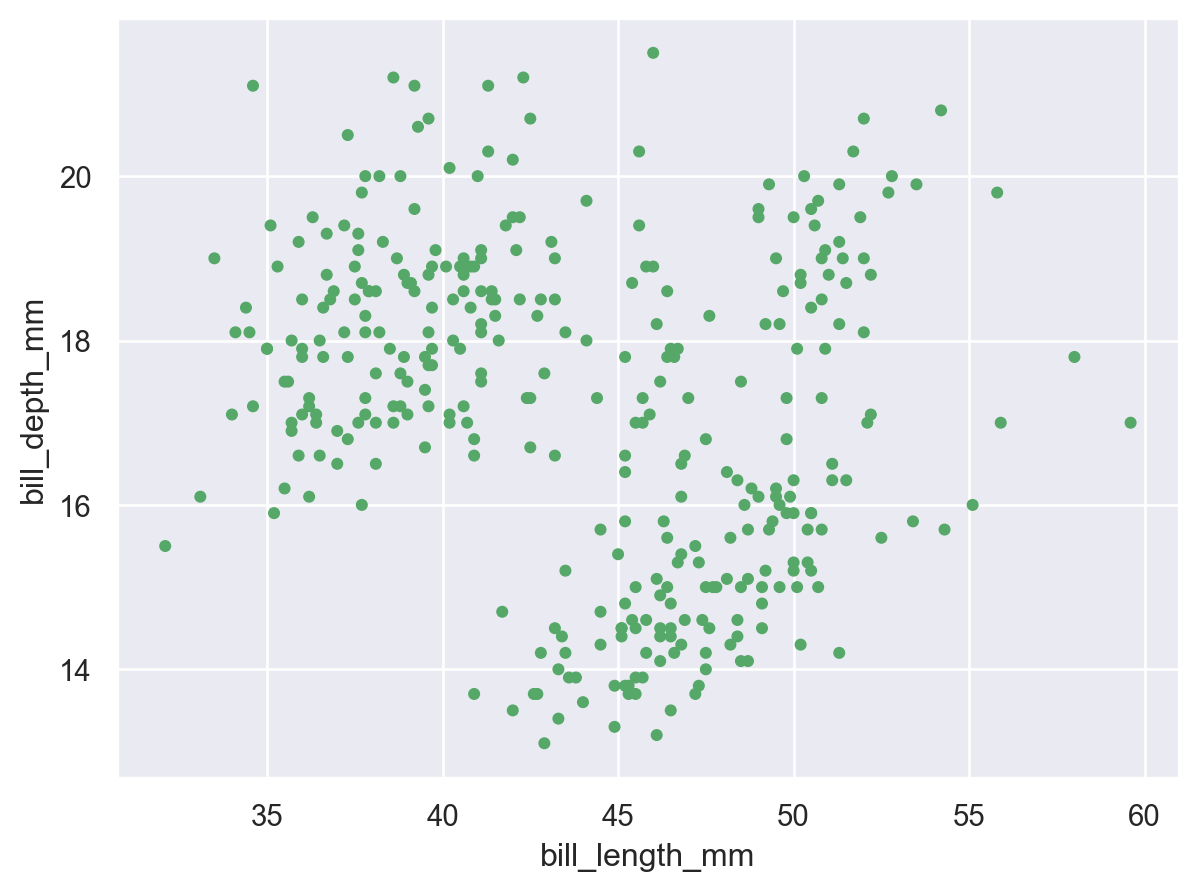

In [6]:
(
    so.Plot(penguins, x = 'bill_length_mm', y = 'bill_depth_mm')
    .add(so.Dot(color = 'g', pointsize = 4))
)

`scatterplot`을 생성하는 이 코드는 상당히 익숙해 보일 것이다. `seaborn.scatterpot()`을 사용할 때와 마찬가지로, 깔끔한 데이터 프레임을 전달하고 그 중 두 개의 열을 플롯 `x` 및 `y` 좌표에 할당했다. 하지만 여기서는 차트 유형부터 시작한 다음 데이터 할당을 추가하는 대신, 데이터 할당부터 시작한 다음 그래픽 요소를 추가했다.

## Setting properties
도트 클래스는 데이터 값을 그래픽으로 나타내는 객체인 마크의 예입니다. 각 마크에는 모양을 변경할 수 있도록 설정할 수 있는 여러 속성이 있다.

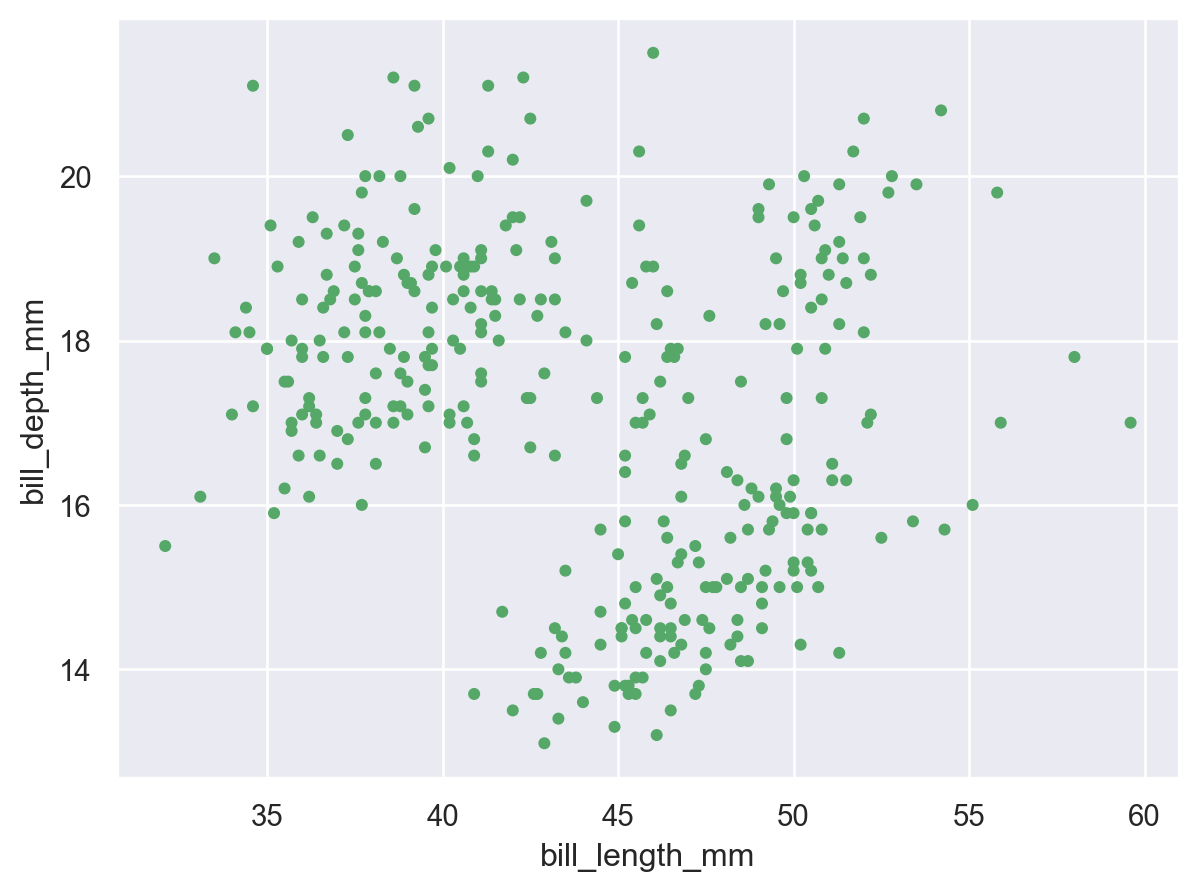

In [7]:
(
    so.Plot(penguins, x = 'bill_length_mm', y = 'bill_depth_mm')
    .add(so.Dot(color = 'g', pointsize = 4))
)

## Mapping properties
또한 Seaborn 기능과 마찬가지로 데이터 값을 다양한 그래픽 속성에 매핑하는 것도 가능하다.

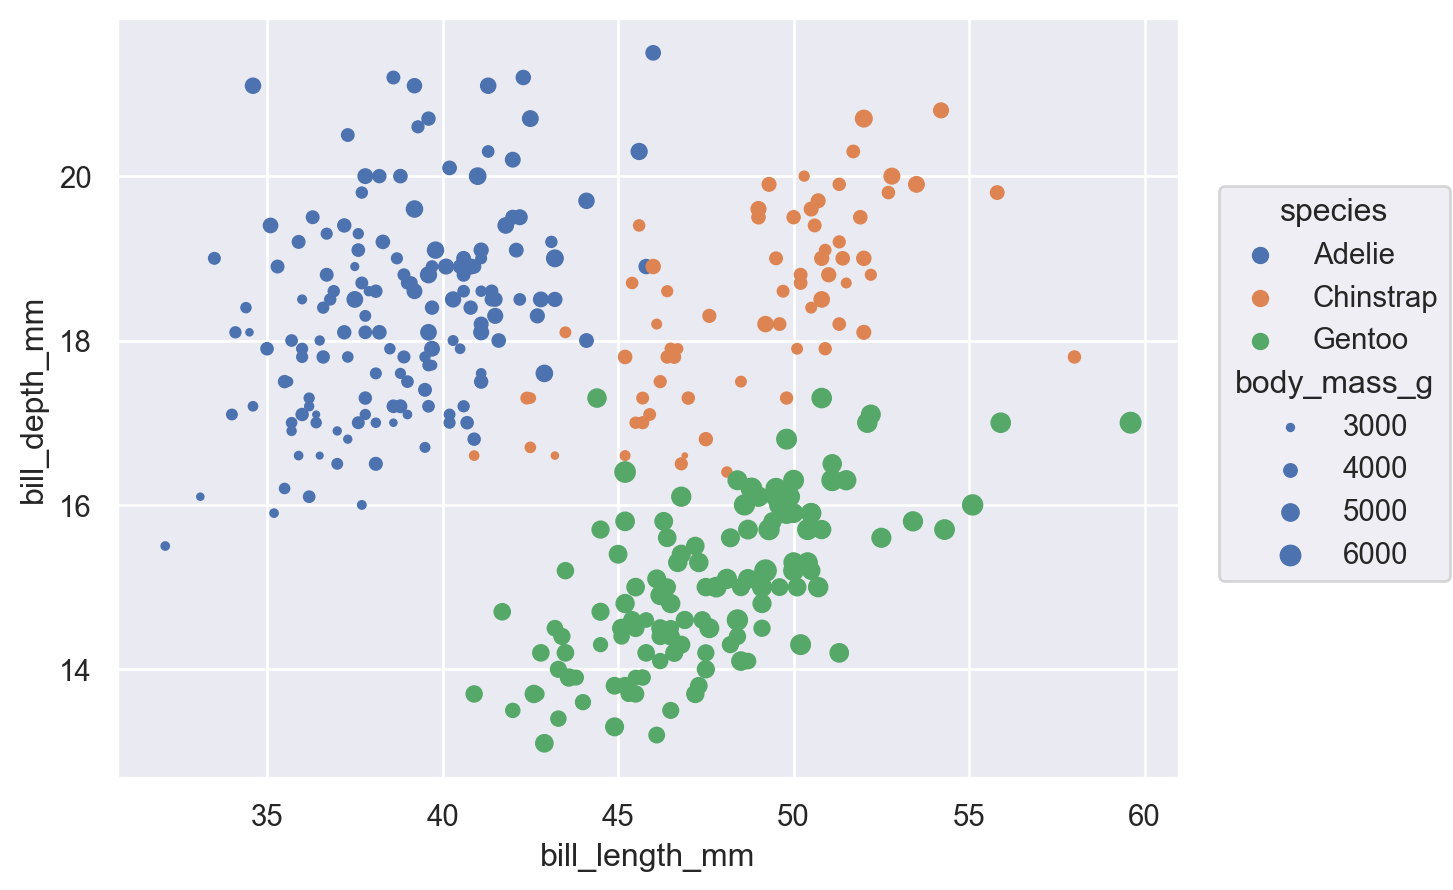

In [8]:
(
    so.Plot(
        penguins, x = 'bill_length_mm', y = 'bill_depth_mm',
        color = 'species', pointsize = 'body_mass_g'
    )
    .add(so.Dot())
)

이 기본 기능은 새롭지는 않지만, 함수 API 와의 중요한 차이점은 프로퍼티를 직접 설정하는 것과 동일한 매개변수 이름을 사용하여 매핑한다는 점입니다. 중요한 것은 프로퍼티가 정의되는 위치입니다. 도트를 초기화할 때 값을 전달하면 프로퍼티가 직접 설정되는 반면, 플롯을 설정할 때 변수를 할당하면 해당 데이터가 매핑됩니다.

이러한 차이점 외에도 개체 인터페이스를 사용하면 훨씬 더 광범위한 마크 속성을 매핑할 수 있다.

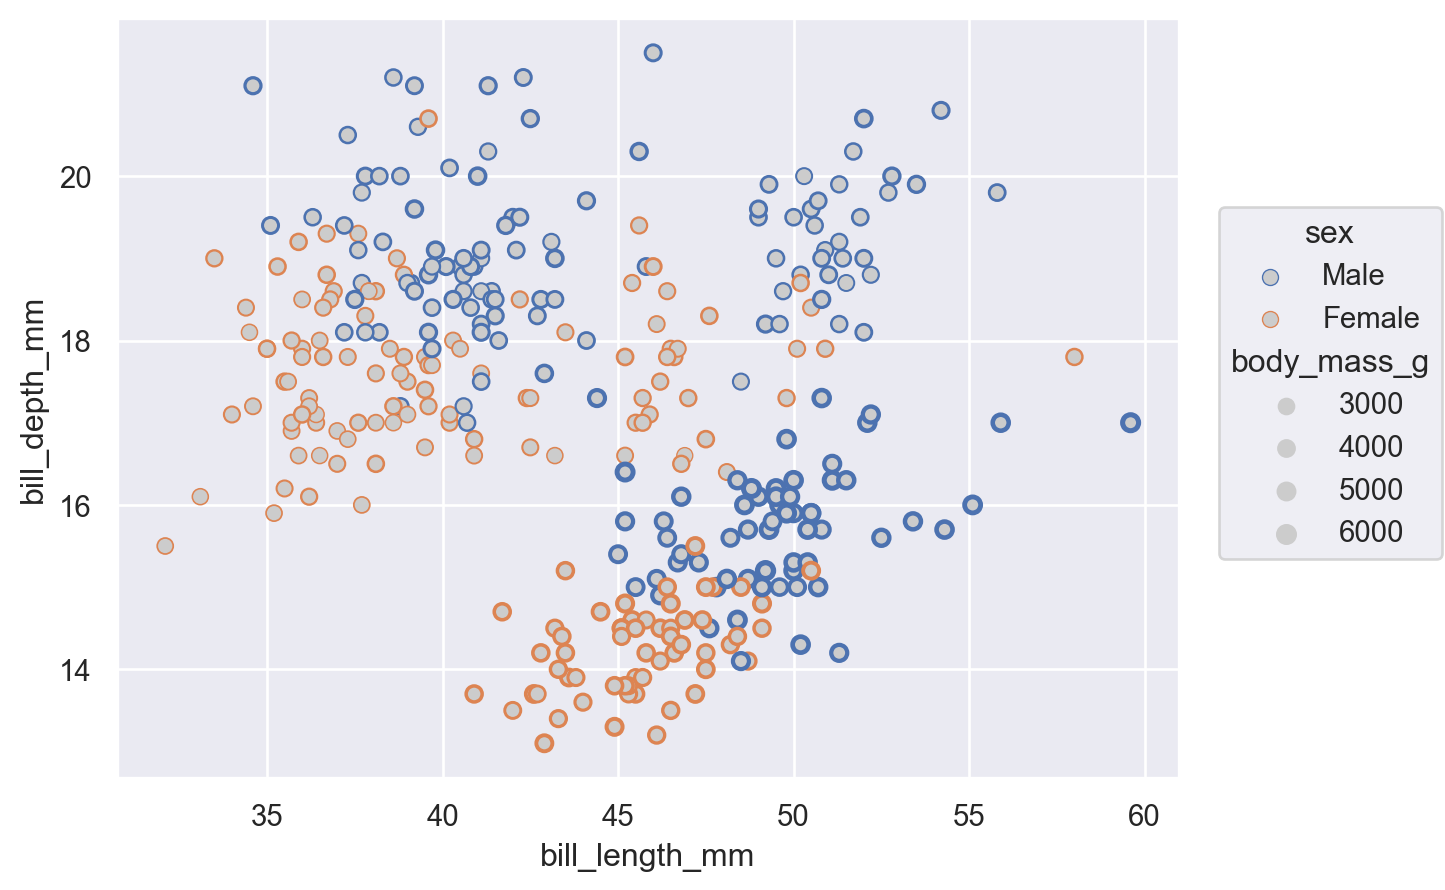

In [9]:
(
    so.Plot(
        penguins, x = 'bill_length_mm', y = 'bill_depth_mm',
        edgecolor = 'sex', edgewidth = 'body_mass_g',
    )
    .add(so.Dot(color = '.8'))
)

## Defining groups
점 마크는 각 데이터 요소를 독립적으로 나타내므로 속성에 변수를 할당하면 각 점 모양이 변경되는 효과만 있습니다. 라인과 같이 관측값을 그룹화하거나 연결하는 마크의 경우 고유한 그래픽 요소의 수 또한 결정합니다.

In [11]:
healthexp = sns.load_dataset('healthexp')
healthexp.columns 

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

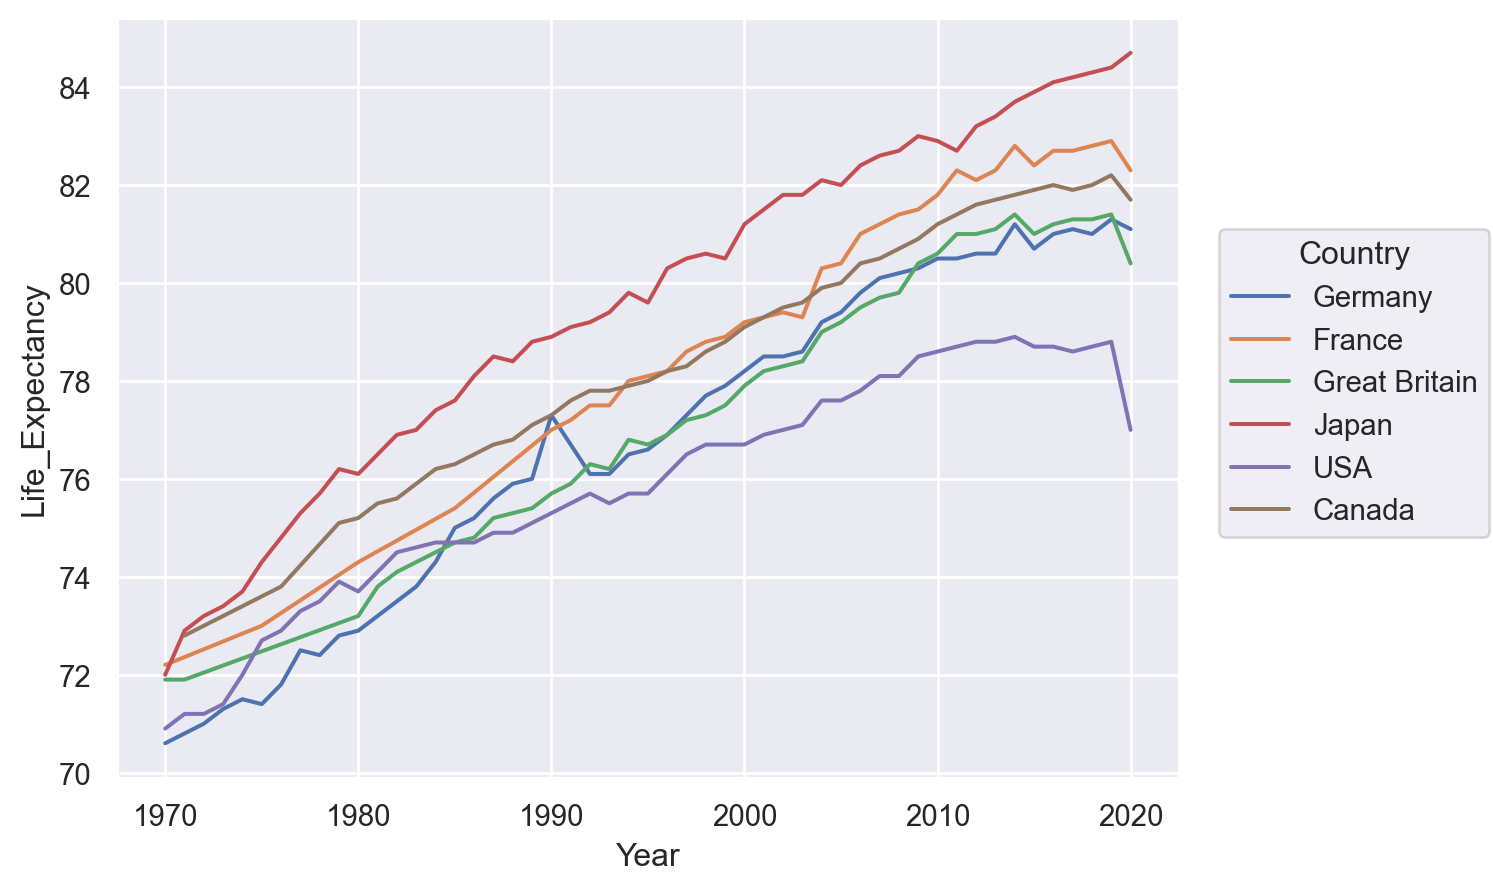

In [12]:
(
    so.Plot(healthexp, x = 'Year', y = 'Life_Expectancy', color = 'Country')
    .add(so.Line())
)

그룹을 사용하여 시각적 속성을 변경하지 않고 그룹을 정의할 수도 있습니다.

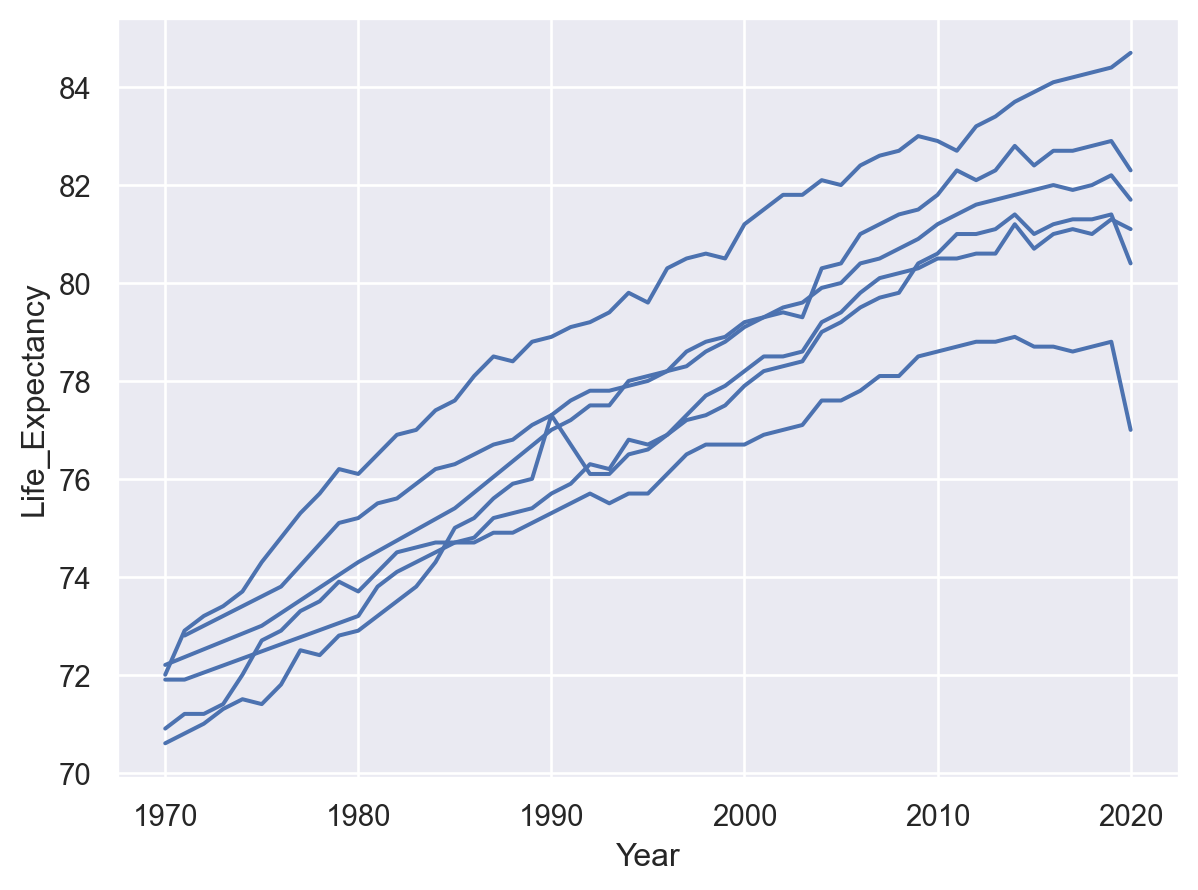

In [13]:
(
    so.Plot(healthexp, x = 'Year', y = 'Life_Expectancy', group = 'Country')
    .add(so.Line())
)